In [1]:
import os
import cv2

import numpy as np
from numpy import expand_dims

import PIL, requests
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as img

import tensorflow as tf
import tensorflow.keras.layers as LK 
import tensorflow.keras.models as MK

from keras.optimizers import SGD
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model, Model

In [2]:
#PREPROCESAMIENTO
train_datagen = ImageDataGenerator(
        rescale=1./255,  
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#Carga una carpeta de trabajo
train_dataset = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Final/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_dataset = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Final/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# ***ESTRUCTURA DE LA CNN***

In [3]:
inputs = LK.Input(shape=(64,64,3)) 

conv1 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(inputs) 
conv2 = LK.Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv1) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
drop1= LK.Dropout(0.5)(pool1)

conv3 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop1) 
conv4 = LK.Conv2D(64,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv3) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4) 
drop2= LK.Dropout(0.25)(pool2)

conv5 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(drop2) 
conv6 = LK.Conv2D(128,(3,3),padding='same', kernel_initializer='he_normal', activation='relu')(conv5) 
pool3 = LK.MaxPool2D((2,2),(2,2))(conv6) 
drop3= LK.Dropout(0.15)(pool3)

flat =  LK.Flatten()(drop3) 
FC3 = LK.Dense(128,activation='relu', kernel_initializer='he_normal')(flat)
outputs = LK.Dense(10,activation='softmax')(FC3) 

modelo = MK.Model(inputs,outputs)
modelo.summary()
optimo = SGD(lr=0.001, momentum=0.9)
modelo.compile(optimizer = optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'] )


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)       

Epoch 1/100
44/44 [==============================] - 12s 271ms/step - loss: 0.0201 - accuracy: 0.9921 - val_loss: 0.1276 - val_accuracy: 0.9600
Epoch 2/100
44/44 [==============================] - 12s 263ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.1148 - val_accuracy: 0.9667
Epoch 3/100
44/44 [==============================] - 12s 263ms/step - loss: 0.0306 - accuracy: 0.9921 - val_loss: 0.1069 - val_accuracy: 0.9583
Epoch 4/100
44/44 [==============================] - 11s 258ms/step - loss: 0.0246 - accuracy: 0.9907 - val_loss: 0.1121 - val_accuracy: 0.9700
Epoch 5/100
44/44 [==============================] - 12s 264ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.1622 - val_accuracy: 0.9500
Epoch 6/100
44/44 [==============================] - 11s 261ms/step - loss: 0.0196 - accuracy: 0.9914 - val_loss: 0.1113 - val_accuracy: 0.9633
Epoch 7/100
44/44 [==============================] - 11s 260ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.1374 - val_accuracy:

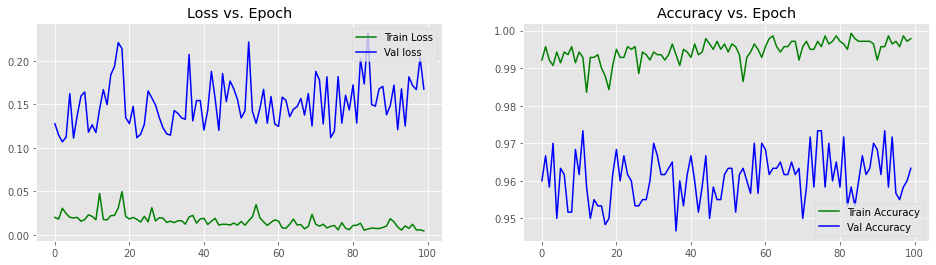

In [28]:
#Entrenamiento
history = modelo.fit(train_dataset, epochs=100, batch_size=64,validation_data=(test_dataset), verbose=1)
loss,acc= modelo.evaluate(test_dataset,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss,acc) )
'''
model.fit(
          train_dataset,
          steps_per_epoch=2000, #numero de imagenes 
          epochs=50,
          validation_data = test_dataset,
          validation_steps=800)
'''
#GRÁFICA DE ACCURACY Y LOSS

from pylab import rcParams
rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Loss vs. Epoch')
ax2.set_title('Accuracy vs. Epoch')

ax1.plot(history.history['loss'], color='green', label='Train Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Val loss')

ax2.plot(history.history['accuracy'], color='green', label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], color='blue', label='Val Accuracy')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()

Con Tapabocas


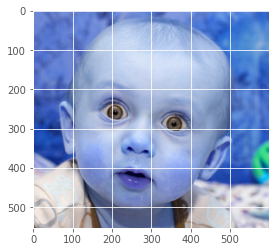

In [38]:
from keras.models import load_model, Model

#model = load_model('model.h5')

img = cv2.imread('/content/drive/MyDrive/Prueba/Tapa9.jpg')

img_r = cv2.resize(img,(64,64))
img_r = img_r.reshape(1,64,64,3)
img_r = img_r.astype('float32')/255.0

etiquetas = ['Con Tapabocas','Sin Tapabocas']
resultado = modelo.predict(img_r)[0]
label = etiquetas[np.argmax(resultado)]

print(label)
plt.imshow(img)
plt.show()
